# Predicting shooting hand based on height and weight of NHL players
by Jay Mangat, Michael Gelfand, 

In [1]:
import pandas as pd
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay 

## Summary
Is there a correlation between a NHL player's height/weight and their shooting hand? We endeavoured to solve this using a logisitic regression model and a database of NHL players for the 2023-2024 NHL season. After creating our model, we found 

## Introduction
provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
clearly state the question you tried to answer with your project
identify and describe the dataset that was used to answer the question

# Methods

## Data

The data set for this shot predictor project is of National Hockey League (NHL) roster information created by the Data Science Learning Community (Data Science Learning Community, 2024) for the Tidy Tuesday project repository. The data here was created using the NHL's API and loaded on to the Tidy Tuesday repository [here](https://github.com/rfordatascience/tidytuesday/blob/master/data/2024/2024-01-09/nhl_rosters.csv). Each row in the data set contains information about all hockey players on every team from the 1917-1918 season to the 2023-2024 season. The rows include information such as name, birth date, and body dimensions. 

## Analysis

A logistic regression classifier was used to create a model which will predict whether a hockey player shoots left or right based on their height and weight. As the team is only interested in those two specific columns for predicting shooting side, all other columns were dropped. The test set was created using 30% of the records from the initial data set, leaving 70% of records for model training. For this analysis, the class weight parameter was set to balanced to ensure that the classes are equal and to avoid class imbalance. Data cleanup was done to remove duplicate records and null values and [reprocessing was done on the height and weight input features to standardize them. To perform the analysis, the Python programming language (Python Software Foundation, n.d.) was used along with the following packages: Pandas (The pandas development team, n.d.), Altair (VanderPlas et al., n.d.), and scikit-learn (Pedregosa et al., 2011).

# Results

Exploratory data analysis was done to visual class distributions for the training data. From this we can see whether there are large class imbalances which could negatively impact the true accuracy of the model.

In [2]:
alt.data_transformers.enable("vegafusion")

# Read in dataset from github 
rosters = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2024/2024-01-09/nhl_rosters.csv")
rosters.to_csv('data/nhl_rosters.csv')

In [3]:
# Data wrangling and cleanup
# Drop NA records
rosters_clean = rosters[["weight_in_kilograms","height_in_centimeters","shoots_catches"]]
rosters_clean = rosters_clean.dropna()

# Convert target column to binary with shoots left as 1 and shoots right as 0
pd.set_option('future.no_silent_downcasting', True)
rosters_clean["shoots_left"] = rosters_clean["shoots_catches"].replace({'L': True, 'R': False}).astype(bool)
rosters_clean = rosters_clean.drop("shoots_catches", axis = 1)

In [14]:
# Split into train and test
train_df, test_df = train_test_split(rosters_clean, test_size=0.3, random_state=123)

In [5]:
# Examine the data set for exploratory data analysis
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38200 entries, 22925 to 53045
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   weight_in_kilograms    38200 non-null  float64
 1   height_in_centimeters  38200 non-null  float64
 2   shoots_left            38200 non-null  bool   
dtypes: bool(1), float64(2)
memory usage: 932.6 KB


In [6]:
# Get information about numeric features
train_df.describe()

,weight_in_kilograms,height_in_centimeters
count,38200.000000,38200.000000
mean,88.651545,183.881806
std,8.231288,5.917253
min,57.000000,160.000000
25%,84.000000,180.000000
50%,88.000000,183.000000
75%,94.000000,188.000000
max,120.000000,206.000000


In [7]:
# View first five records of dataset 
train_df.head()

,weight_in_kilograms,height_in_centimeters,shoots_left
22925,87.0,183.0,True
18712,92.0,188.0,False
1702,88.0,185.0,True
8026,84.0,180.0,False
6122,93.0,188.0,False


In [8]:
# Perform exploratory data analysis
alt.Chart(train_df).mark_bar().encode(
    alt.X(alt.repeat("row")).type('quantitative').bin(),
    alt.Y("count()"),
    alt.Fill("shoots_left")
).facet(
    "shoots_left"
).repeat(
    row=['weight_in_kilograms', 'height_in_centimeters'],
)

alt.RepeatChart(...)

Figure 1. Comparison of count distributions of input features for players that shoot left or right.

In [9]:
# Lists of feature names
numeric_features = ["weight_in_kilograms","height_in_centimeters"]

# Create the column transformer
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),  # scaling on numeric features
)

In [10]:
# Create X and y data frames for train and test data
X_train = train_df.drop(columns=["shoots_left"])
X_test = test_df.drop(columns=["shoots_left"])
y_train = train_df["shoots_left"]
y_test = test_df["shoots_left"]

In [11]:
# Create the logistic regression model pipeline and fit on the training data
logreg = make_pipeline(preprocessor, LogisticRegression(random_state=123, class_weight="balanced"))
logreg.fit(X_train, y_train);

In [12]:
# Score the logistic regression model on the test data
logreg.score(X_test, y_test)

0.5155753725873442

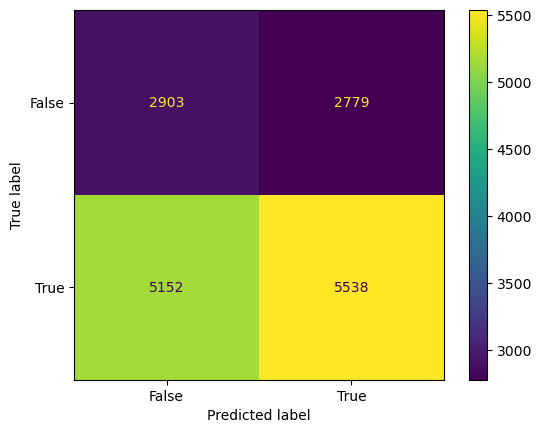

In [13]:
# Display confusion matrix for model performance on test set
cm = ConfusionMatrixDisplay.from_estimator(
    logreg,
    X_test,
    y_test,
    values_format="d",
)

Figure 2. Confusion matrix for model performance on test set

# References

Data Science Learning Community. (2024). NHL rosters dataset. Tidy Tuesday project repository. https://github.com/rfordatascience/tidytuesday/blob/master/data/2024/2024-01-09/nhl_rosters.csv

Python Software Foundation. (n.d.). Python programming language. https://www.python.org/

The pandas development team. (n.d.). Pandas: Powerful Python data analysis toolkit. https://pandas.pydata.org/

VanderPlas, J., et al. (n.d.). Altair: Declarative statistical visualization library for Python. https://altair-viz.github.io/

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825–2830. https://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf